In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
%matplotlib inline


Loading the dataset

In [34]:
data= pd.read_csv("https://raw.githubusercontent.com/Sang555/ece228/main/atlantic.csv")
data.head

<bound method NDFrame.head of              ID                 Name      Date  Time Event Status Latitude  \
0      AL011851              UNNAMED  18510625     0           HU    28.0N   
1      AL011851              UNNAMED  18510625   600           HU    28.0N   
2      AL011851              UNNAMED  18510625  1200           HU    28.0N   
3      AL011851              UNNAMED  18510625  1800           HU    28.1N   
4      AL011851              UNNAMED  18510625  2100     L     HU    28.2N   
...         ...                  ...       ...   ...   ...    ...      ...   
49100  AL122015                 KATE  20151112  1200           EX    41.3N   
49101  AL122015                 KATE  20151112  1800           EX    41.9N   
49102  AL122015                 KATE  20151113     0           EX    41.5N   
49103  AL122015                 KATE  20151113   600           EX    40.8N   
49104  AL122015                 KATE  20151113  1200           EX    40.7N   

      Longitude  Maximum Wind  Mi

The previous cell shows that the dataset contains around 49,000 entries with 22 features for each storm. The first step is to find out how many unique storms are in the database.

In [4]:
len(data.ID.unique()) 


1814

Thus, there are a total of 1814 storms in the database, which occured in the Atlantic region from 1851 to 2021.

In [5]:
# Viewing the number of entries per storm

data.groupby(by=["ID"]).Name.count()

ID
AL011851    14
AL011852    45
AL011853     1
AL011854    11
AL011855     1
            ..
AL282005    33
AL291969    17
AL292005    42
AL302005    43
AL312005    36
Name: Name, Length: 1814, dtype: int64

In [7]:
# Maximum entries a particular storm has

data.groupby(by=["ID"]).Name.count().max()

133

In [ ]:

data=data.groupby('ID').filter(lambda x: len(x)>6)

In [9]:
#Number of unique storms in updated HURDAT2

len(data.ID.unique())

1814

In [35]:
#Removing N and W from Lat-Long as it will create an issue during the DL model. 

data['Latitude1'] = data['Latitude'].str[:-1]
data['Latitude1'] = data['Latitude1'].astype(float)
data['Longitude1'] = data['Longitude'].str[:-1]
data['Longitude1']= data['Longitude1'].astype(float)


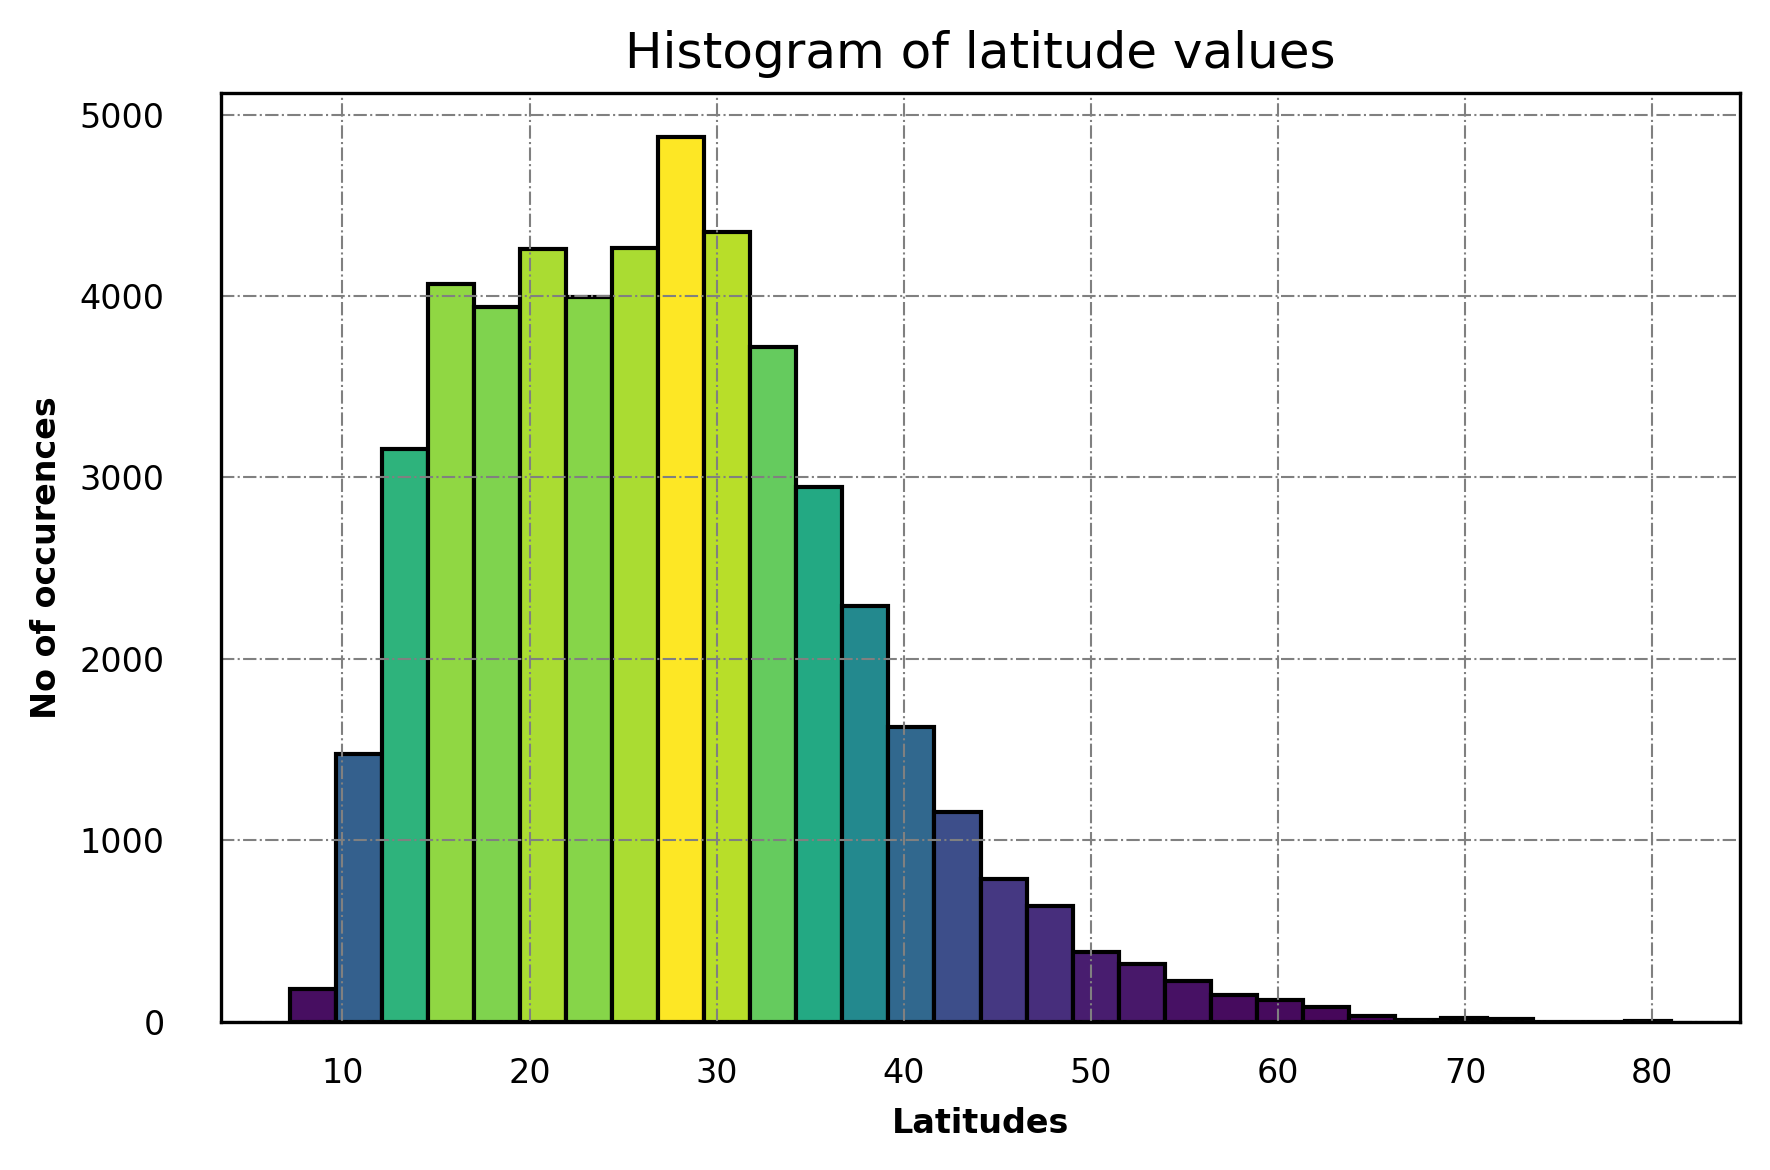

<Figure size 1800x1200 with 0 Axes>

In [36]:
#Histogram of Latitude and Longitude 

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams['figure.dpi'] = 300
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["figure.autolayout"] = True


# Creating histogram
fig, axs = plt.subplots(1, 1,
                        )
 
 
# Remove axes splines

 
# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        )

# Creating histogram
N, bins, patches = axs.hist(data['Latitude1'], bins=30,edgecolor = "black")

# Setting color
fracs = ((N**(1 )) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.grid(True)
axs.set_xlabel('Latitudes', fontsize=8,fontweight='bold')
axs.set_ylabel('No of occurences', fontsize=8,fontweight='bold')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Histogram of latitude values")

# Show plot
plt.show()
plt.savefig("latitude.png")

Text(0, 0.5, 'No of storms-->')

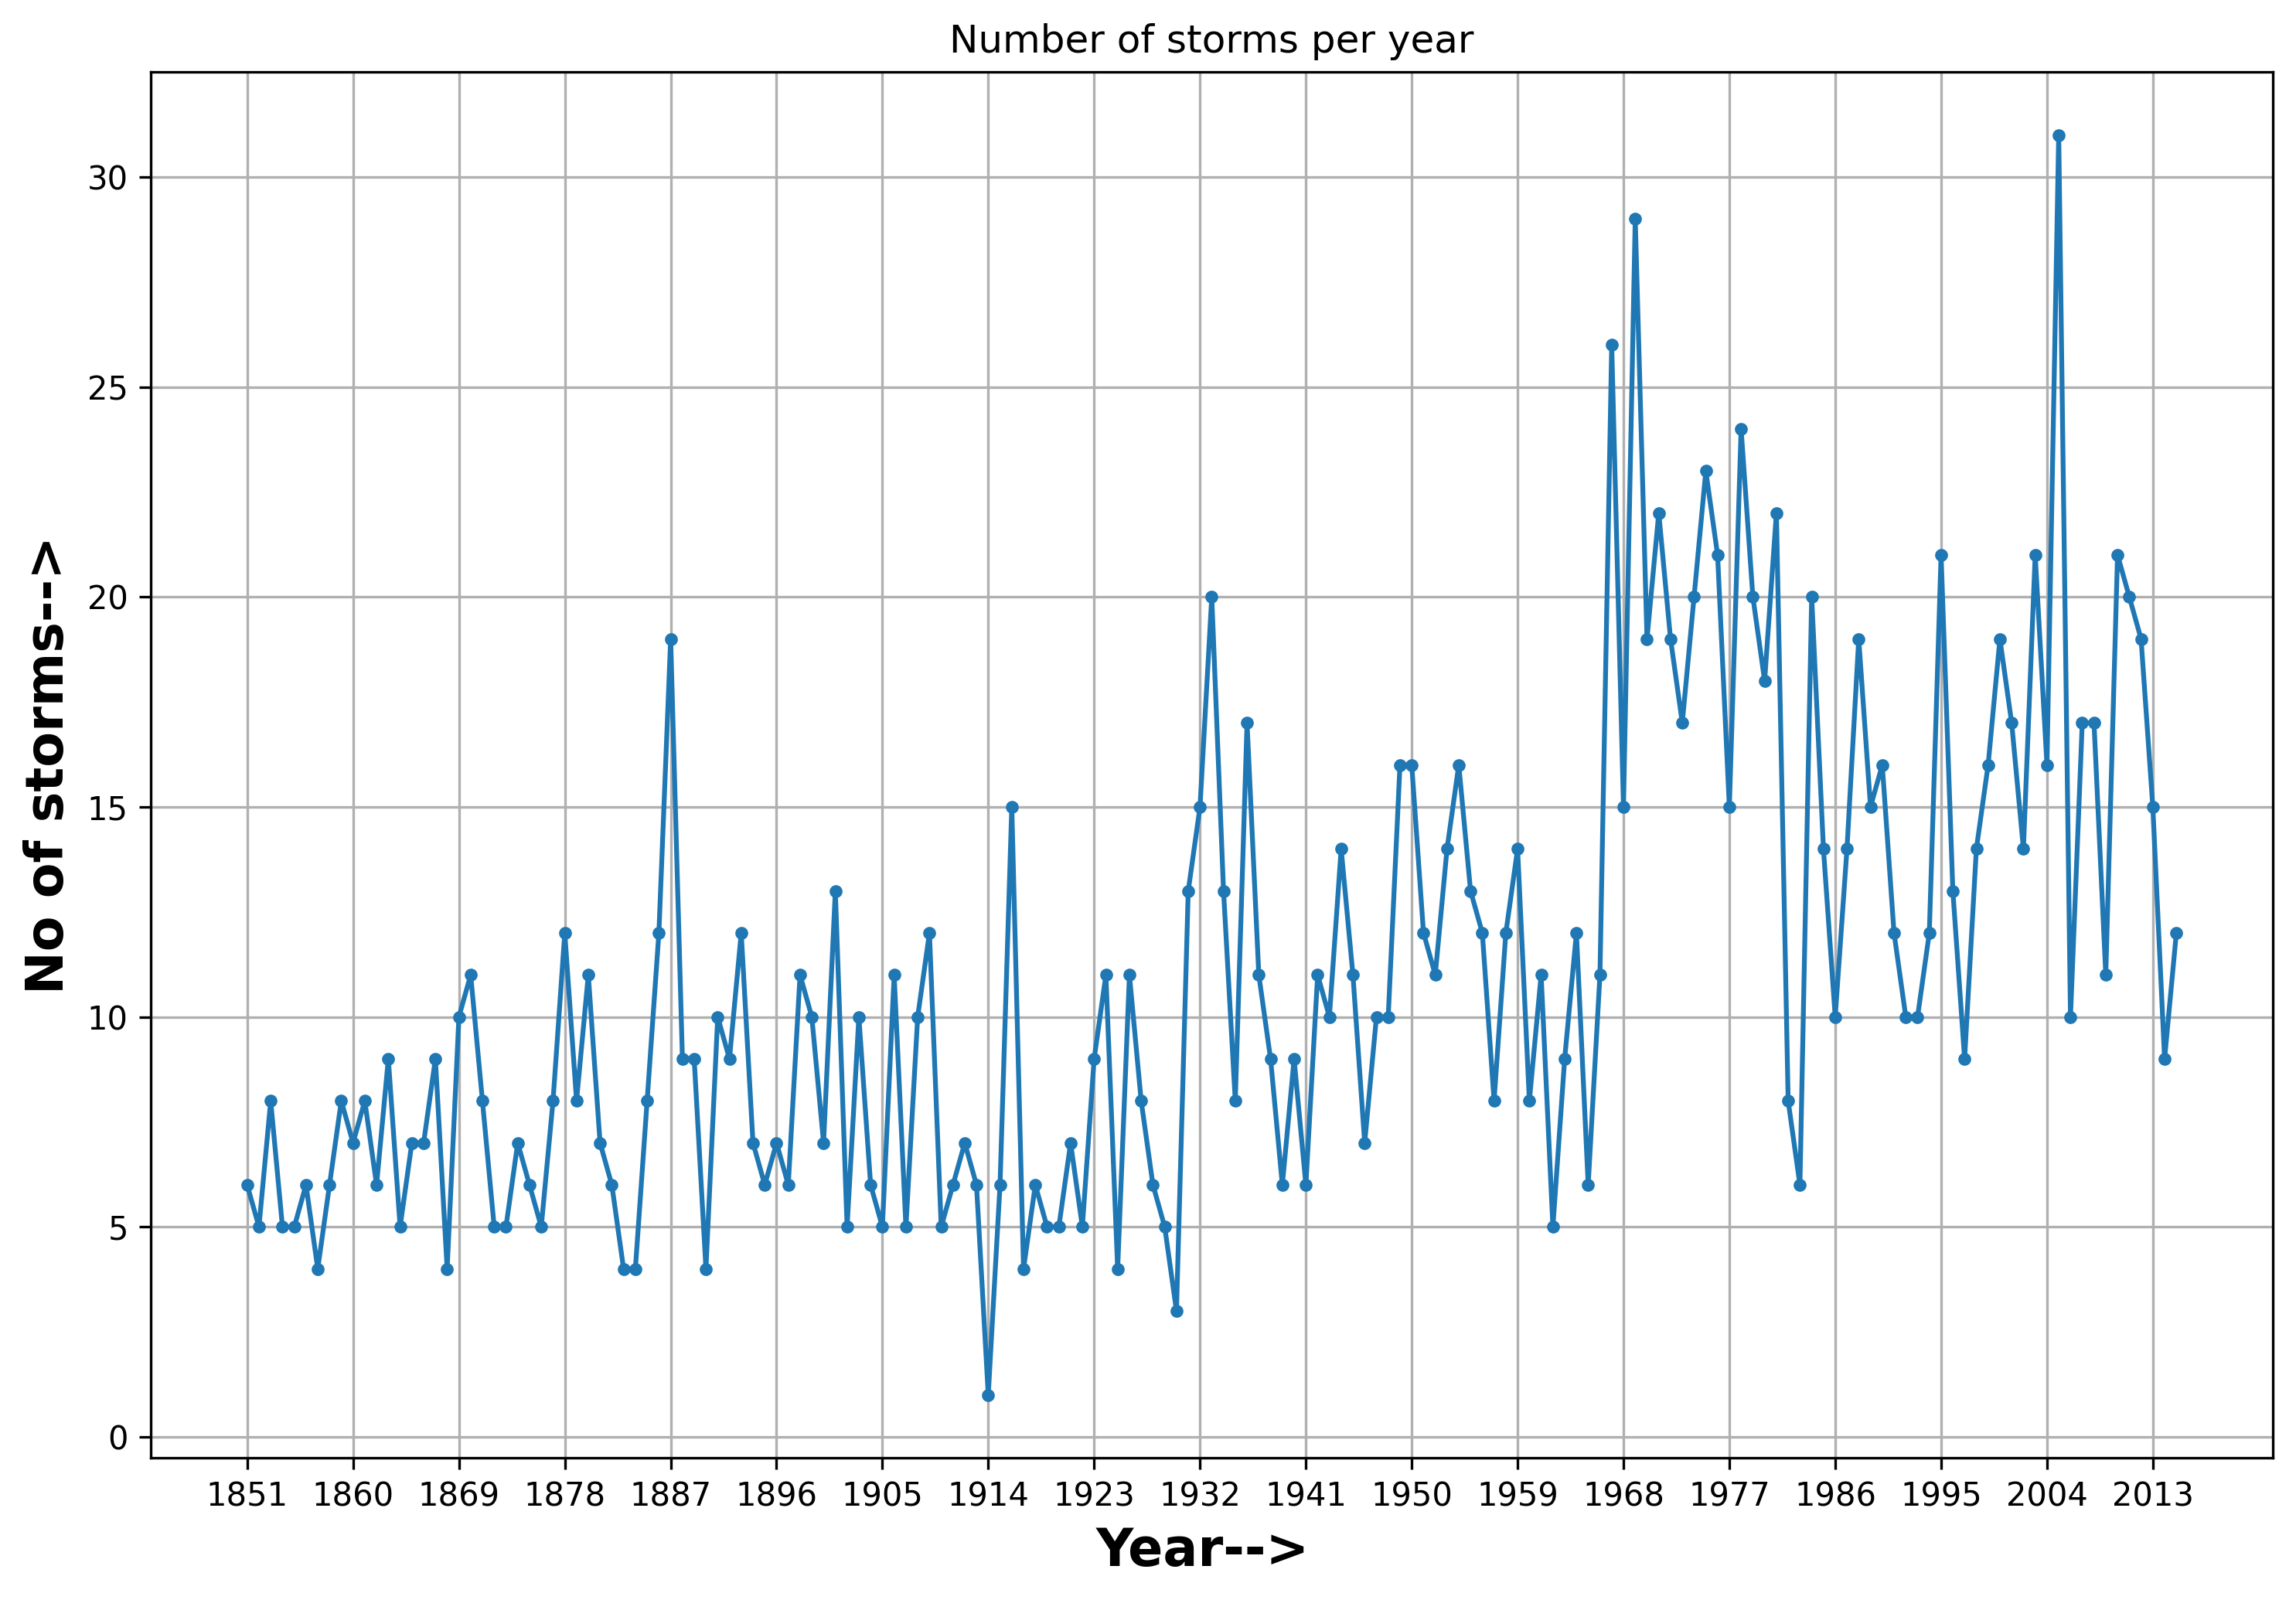

In [37]:
# Plot of the number of hurricanes per year. This information gives us the trends in hurricanes over the years. The graph clearly shows that over the years, the number of hurricanes has increased which can be attributed to global warming. 

data2=data.ID.unique()
data3=data2.astype(str)
x=[u[-4:] for u in data3]
storm_years=np.array(x)
storm_years.astype(int)
s1=np.ndarray.flatten(storm_years)

(unique, counts)=np.unique(s1,return_counts=True)

fig, ax = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
plt.plot(unique,counts,marker = '.')
ax.set_xticks(ax.get_xticks()[::9])
plt.title("Number of storms per year")

plt.grid(True)
ax.set_xlabel('Year--> ', fontsize=16,fontweight='bold')
ax.set_ylabel('No of storms-->', fontsize=16,fontweight='bold')




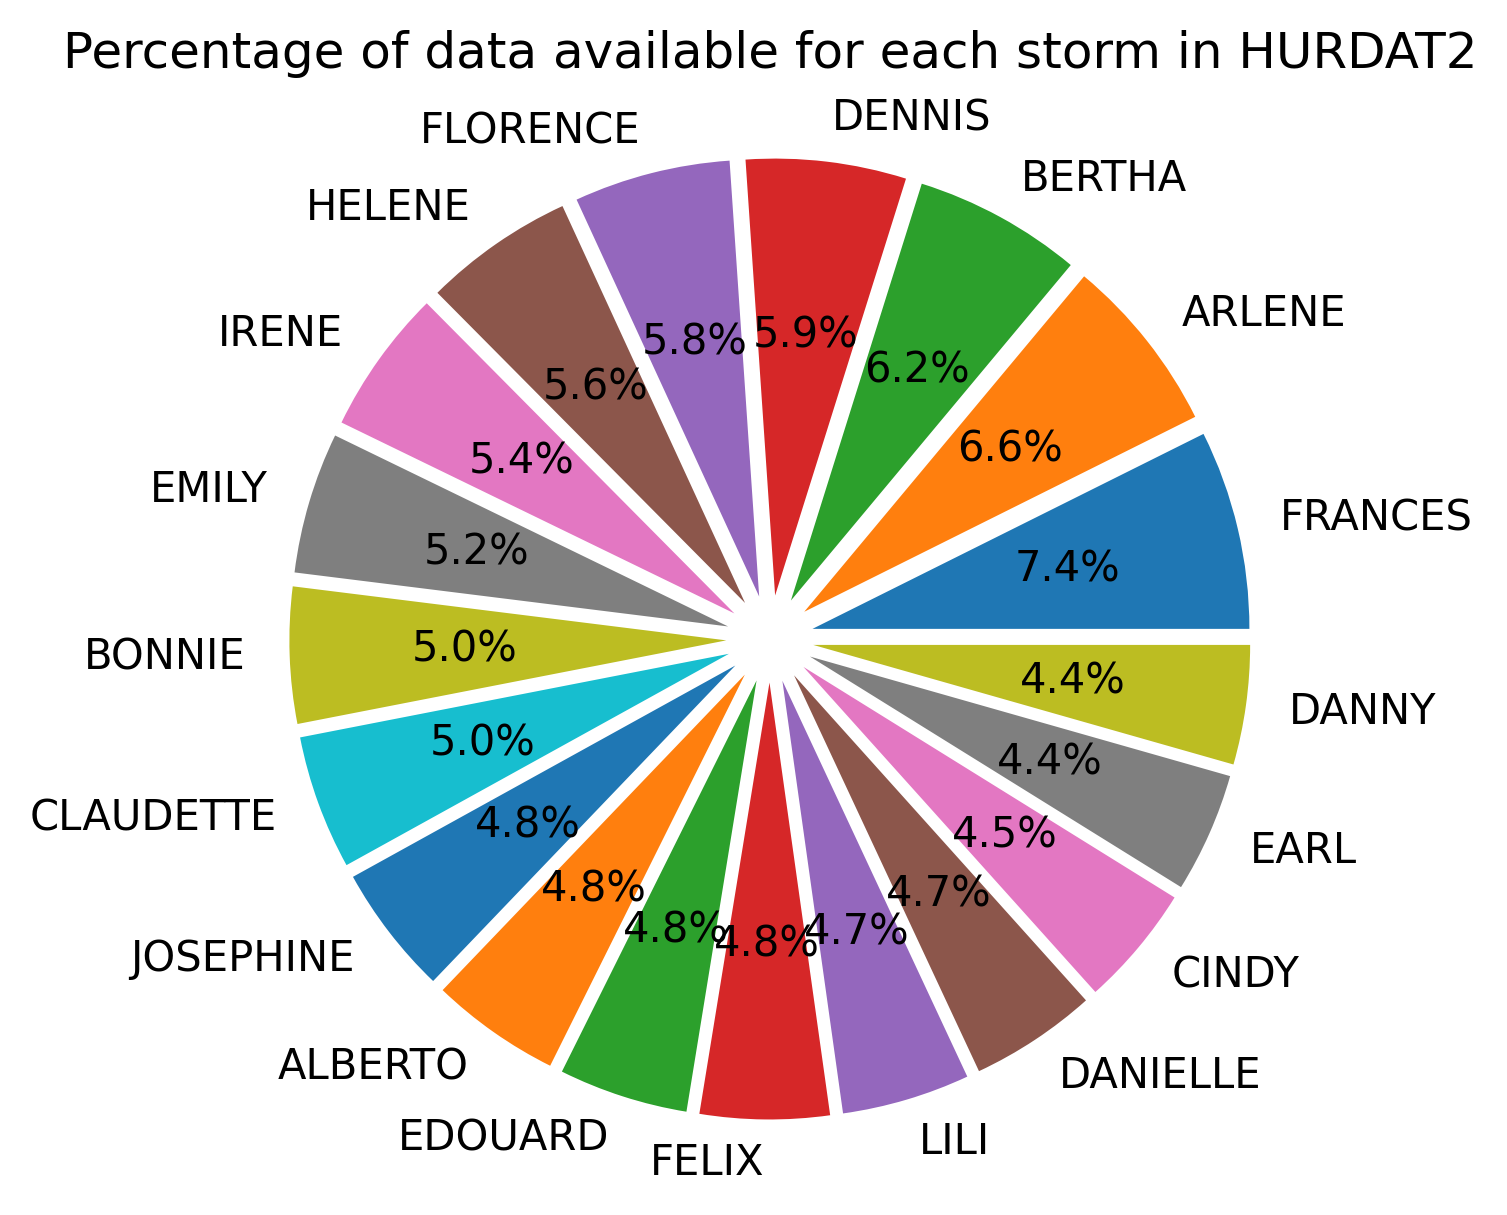

In [38]:
# Visualize the percentage of data available for the storms in HURDAT2. Note that there are many unnamed storms, and hence they have been excluded.

lst = [x.strip() for x in data.groupby('Name').count().sort_values(by = 'Date' , ascending = False).index[1:20]]
val = data.groupby('Name').count().sort_values(by = 'Date' , ascending = False)[1:20]['Date'].values

fig , ax =plt.subplots(1, 1,
                        figsize =(5, 3),
                        tight_layout = True)
fig.set_size_inches(5,5)
ax.pie(  labels = lst , x = val , autopct='%.1f%%' , explode = [0.1 for x in range(19)])
plt.title("Percentage of data available for each storm in HURDAT2")

plt.show()

Text(0, 0.5, 'No of data points-->')

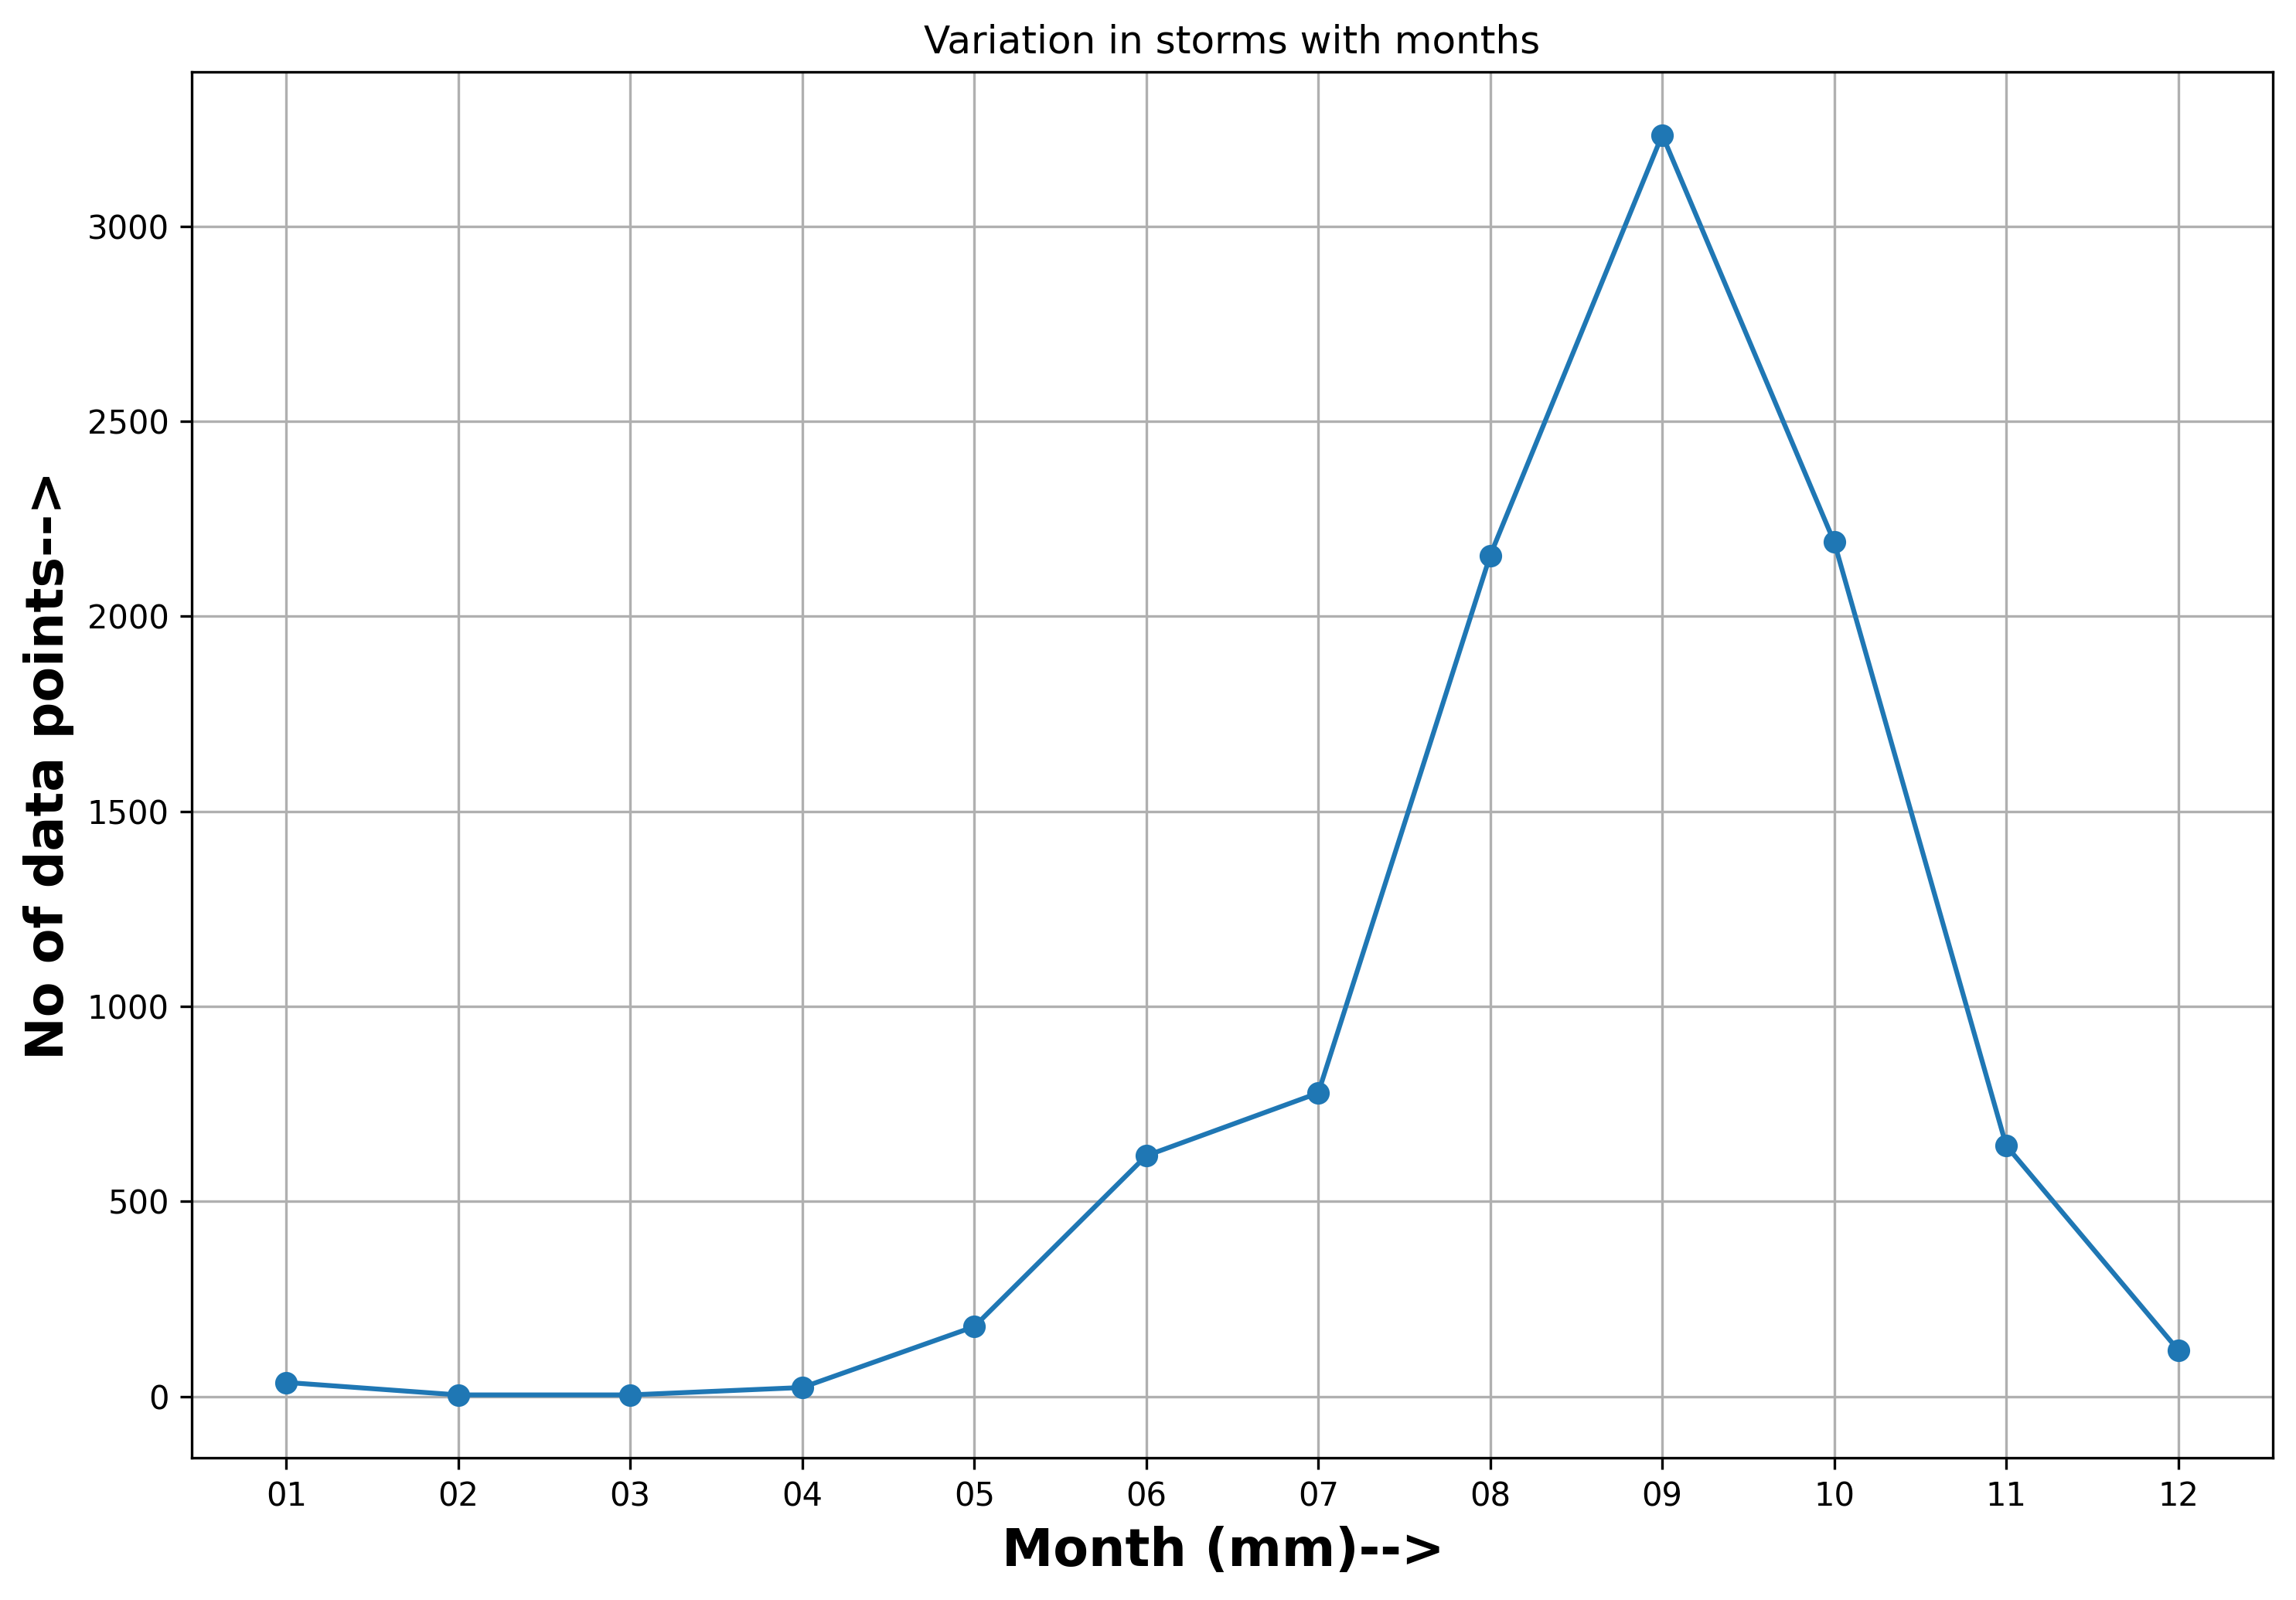

In [39]:
#hurricanes grouped by month. This shows us which is the season for hurricanes.

data_time=data.Date.unique()
data7=data_time.astype(str)
data7
x=[z[4:-2] for z in data7]
storm_months=np.array(x)
storm_months.astype(int)
s1=np.ndarray.flatten(storm_months)

(unique, counts)=np.unique(s1,return_counts=True)

fig, ax = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
plt.plot(unique,counts,marker = 'o')
#ax.set_xticks(ax.get_xticks()[::9])
plt.title("Variation in storms with months")

plt.grid(True)
ax.set_xlabel('Month (mm)--> ', fontsize=16,fontweight='bold')
ax.set_ylabel('No of data points-->', fontsize=16,fontweight='bold')

In [ ]:
data100=data.groupby(by=["ID"]).Name.count()

data100

ID
AL011851    14
AL011852    45
AL011854    11
AL011856    14
AL011857     8
            ..
AL282005    33
AL291969    17
AL292005    42
AL302005    43
AL312005    36
Name: Name, Length: 1729, dtype: int64